After cleansing the data, there are no notable shortcomings.  There is daily commodity data running from August 73 until January 2019.  The primary risk is what is not included.  Weather data, major commodity purchasers, and coffee production are not currently loaded into this notebook due to lack data availability.  These fields would certainly help predict coffee prices.

The next step is to identify a model specification, train the model, then ultimately run it on test data.  Once the model is functional, then additional data can be identified to improve the accuracy of the model. 



In [71]:
#Reading 5 datasets and other packages

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pathlib import Path

coffee = Path('..', 'Final Project', 'Datasets', 'historic_coffee_prices.csv') 
coffee = pd.read_csv(coffee)

corn = Path('..', 'Final Project', 'Datasets', 'historic_corn_prices.csv') 
corn = pd.read_csv(corn)

cotton = Path('..', 'Final Project', 'Datasets', 'historic_cotton_prices.csv') 
cotton = pd.read_csv(cotton)

sugar = Path('..', 'Final Project', 'Datasets', 'historic_sugar_prices.csv') 
sugar = pd.read_csv(sugar)

wheat = Path('..', 'Final Project', 'Datasets', 'historic_wheat_prices.csv') 
wheat = pd.read_csv(wheat)


In [72]:
#Changing column names

coffee.rename(columns = {coffee.columns[1]: 'coffee_prices'}, inplace=True)
corn.rename(columns = {corn.columns[1]: 'corn_prices'}, inplace=True)
cotton.rename(columns = {cotton.columns[1]: 'cotton_prices'}, inplace=True)
sugar.rename(columns = {sugar.columns[1]: 'sugar_prices'}, inplace=True)
wheat.rename(columns = {wheat.columns[1]: 'wheat_prices'}, inplace=True)

In [73]:
#Checking the column names were changed

coffee.head()
corn.head()
cotton.head()
sugar.head()
wheat.head()

,date,wheat_prices
0,7/1/59,1.964
1,7/2/59,1.971
2,7/6/59,1.970
3,7/7/59,1.971
4,7/8/59,1.964


In [75]:
#Merge the 5 different datasets
merge1 = pd.merge(coffee,corn,on='date')
merge2 = pd.merge(merge1,cotton,on='date')
merge3 = pd.merge(merge2,sugar,on='date')
commodities = pd.merge(merge3,wheat,on='date')

commodities.head()

,date,coffee_prices,corn_prices,cotton_prices,sugar_prices,wheat_prices
0,8/20/73,0.6735,3.115,0.7800,0.0852,5.085
1,8/21/73,0.6710,3.015,0.7925,0.0859,5.285
2,8/22/73,0.6580,2.915,0.8100,0.0870,5.085
3,8/23/73,0.6675,2.815,0.8300,0.0880,5.005
4,8/24/73,0.6660,2.900,0.8500,0.0886,5.180


In [85]:
commodities.tail()

,date,coffee_prices,corn_prices,cotton_prices,sugar_prices,wheat_prices
11349,1/14/19,1.0275,3.7850,0.7299,0.1275,5.1425
11350,1/15/19,1.0130,3.7125,0.7236,0.1316,5.1100
11351,1/16/19,1.0240,3.7400,0.7327,0.1317,5.1250
11352,1/17/19,1.0240,3.8000,0.7437,0.1285,5.1775
11353,1/18/19,1.0495,3.8175,0.7389,0.1303,5.1775


In [76]:
#Exploratory Data Analysis


commodities.shape

commodities.describe()




,coffee_prices,corn_prices,cotton_prices,sugar_prices,wheat_prices
count,11354.000000,11354.000000,11354.000000,11354.000000,11354.000000
mean,1.264848,3.119784,0.680981,0.126317,4.171703
std,0.483284,1.217594,0.183875,0.068175,1.466444
min,0.425000,1.427500,0.285200,0.027000,2.147500
25%,0.928000,2.320000,0.577600,0.083000,3.182500
50%,1.243000,2.735000,0.658350,0.109000,3.735000
75%,1.471000,3.587125,0.760575,0.148600,4.777500
max,3.356300,8.312500,2.141400,0.652000,12.825000


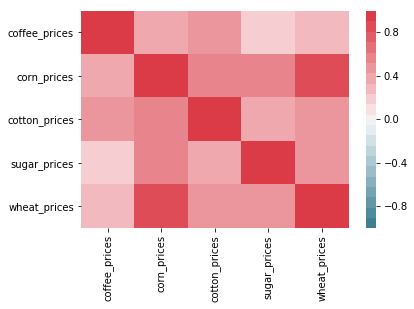

In [77]:
ax = sns.heatmap(
    commodities.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(220, 10, n=21)
)

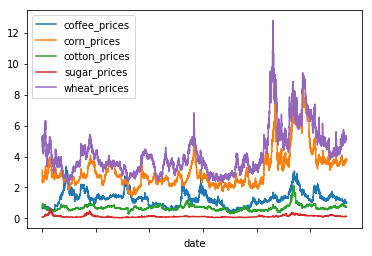

In [86]:
commodities.plot()